In [31]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('data/conjunto_de_datos_viviendas_enigh2022_ns.csv')
df.head(10)

,folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,...,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
0,100005002,1,8,10,3,30,,1,2,2,...,0,3,1,1001,1,4,3,1,206,0
1,100005003,1,8,10,3,15,,1,2,3,...,1,1,1,1001,1,4,3,1,206,0
2,100005004,1,8,10,3,25,,1,2,3,...,2,1,1,1001,1,4,3,1,206,0
3,100012002,1,8,10,3,50,,1,2,4,...,3,2,2,1001,1,3,2,2,167,0
4,100012004,1,8,10,3,45,,1,2,3,...,2,2,1,1001,1,3,2,2,167,0
5,100012006,1,8,10,3,25,,1,2,2,...,2,2,1,1001,1,3,2,2,167,0
6,100019301,1,8,10,3,48,,1,2,5,...,0,1,1,1001,1,4,3,3,212,0
7,100019302,1,8,10,3,36,,1,2,4,...,1,2,1,1001,1,4,3,3,212,0
8,100019303,1,8,10,3,35,,1,2,3,...,1,1,1,1001,1,4,3,3,212,0
9,100019304,1,8,10,3,1,,1,2,3,...,1,4,1,1001,1,4,3,3,212,0


# Selección de Features potencialmente importantes

In [33]:
features = ['antiguedad', 'cuart_dorm', 'num_cuarto', 'bano_comp', 
            'focos_inca', 'focos_ahor', 'tot_resid', 'tot_hom', 'tot_muj', 
            'renta']

df_clean = df[features]


# Limpieza inicial


In [34]:
# Reemplazo de blanks por nan
df_clean.replace(" ", np.nan, inplace=True)

# Se eliminan filas con faltantes
df_clean = df_clean.dropna()

# Asegurar que son de tipo numérico
for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 2nd eliminación de faltantes
df_clean = df_clean.dropna()

# Detección y manejo de outliers

In [35]:
# Limitar la variable de renta
df_clean = df_clean[df_clean['renta'] <= 150000]

# Se definen límites razonables para otras variables
limites = {
    'antiguedad': (0, 100),      # Viviendas con antigüedad entre 0 y 100 años
    'num_cuarto': (1, 20),       # Viviendas con entre 1 y 20 cuartos
    'bano_comp': (0, 10),        # Viviendas con hasta 10 baños
    'tot_resid': (1, 20),        # Hatsa 20 personas por vivienda
    'tot_hom': (0, 20),          # Máx 20 hombres
    'tot_muj': (0, 20)           # Máx 20 mujeres
}

# Eliminación de outliers
for col, (min_val, max_val) in limites.items():
    df_clean = df_clean[(df_clean[col] >= min_val) & (df_clean[col] <= max_val)]



# Exploratorio light para las distribuciopnes

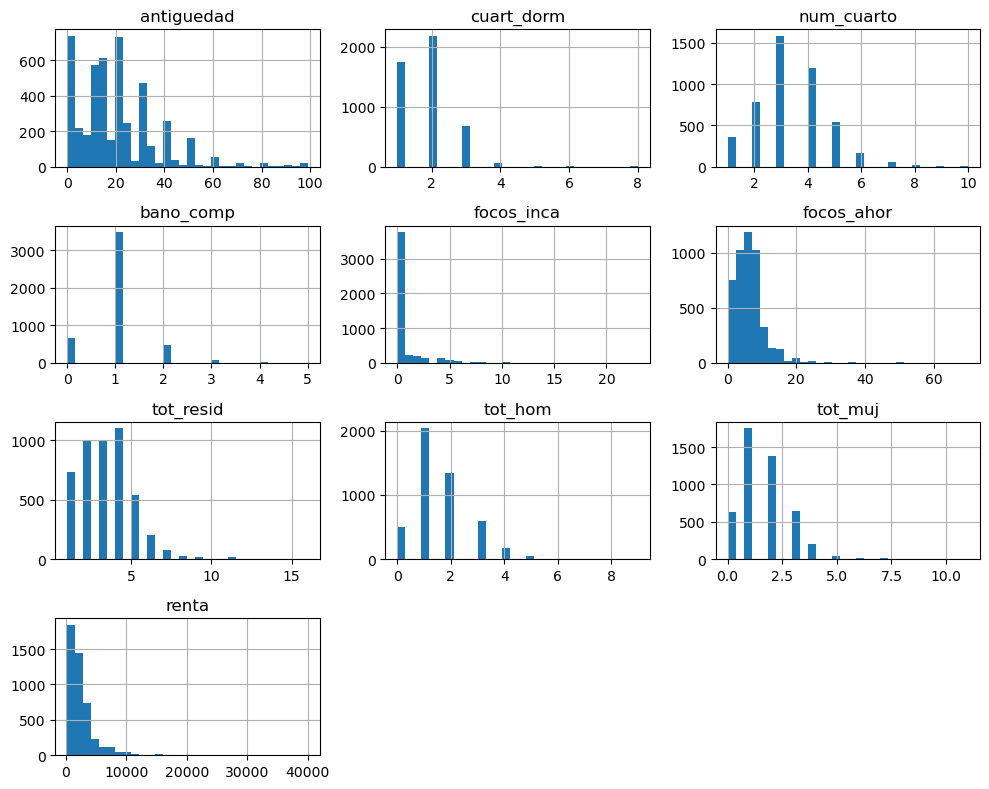

In [36]:
df_clean.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()


In [37]:
# Entender si aplica o no la transformaciój

# Transformación logarítmica en renta y focos_ahor (agrego una pequeña constante para evitar log(0))
df_clean['log_renta'] = np.log(df_clean['renta'] + 0.1)
df_clean['log_focos_ahor'] = np.log(df_clean['focos_ahor'] + 0.1)

# Transformación de raíz en tot_resid
df_clean['sqrt_tot_resid'] = np.sqrt(df_clean['tot_resid'])


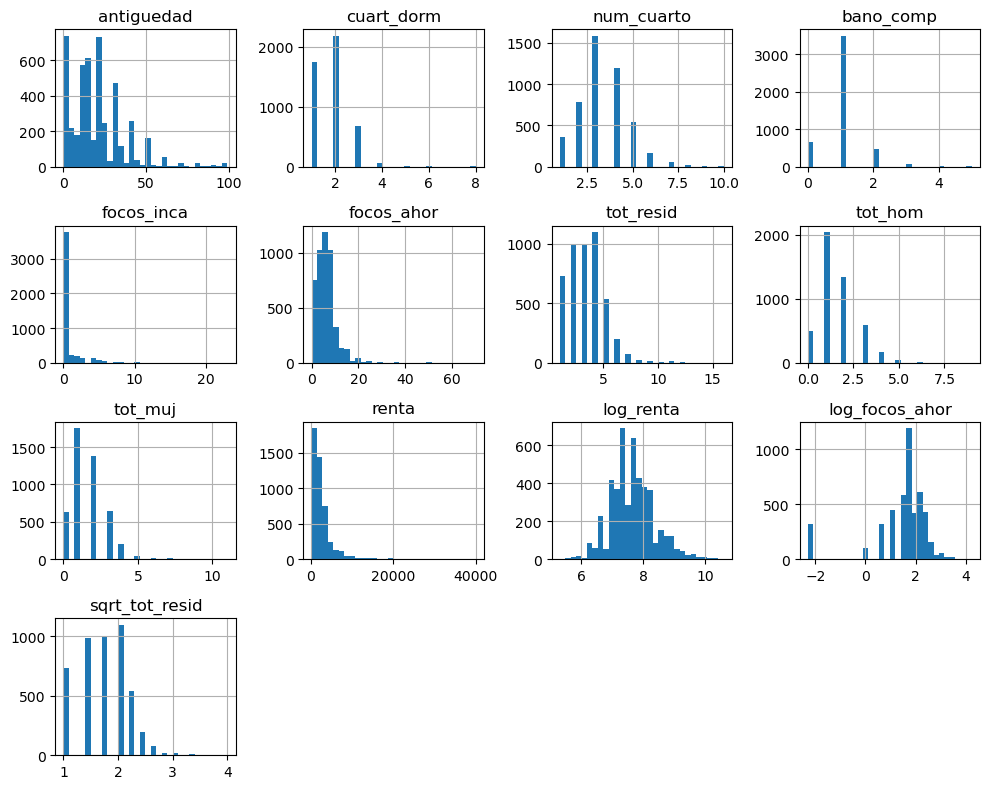

In [38]:
df_clean.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()


# Exportación de datos finales

In [39]:
df_clean.to_parquet('data/data_enigh_clean_v2.parquet')